In [1]:
import pandas as pd
import bnlearn as bn

persona_filename = 'date0729_midterm_personas_full_sonnet.json'

import json

with open(persona_filename, 'r') as f:
    data = json.load(f)


In [2]:
# verify data

def verify(data):
    ok_cnt = 0
    wrong_cnt = 0
    for user in data:
        for persona in data[user]:
            if all(_ not in persona['candidate_values'] for _ in [persona['inferred_value'], persona['inferred_value'][1:-1]]) :
                wrong_cnt += 1
                print(persona)
                print(persona['inferred_value'])
                print(persona['candidate_values'])
                print()
            else:
                ok_cnt += 1

    print(ok_cnt, wrong_cnt)

verify(data)

{'name': 'Employment Status', 'description': 'Whether the individual is currently employed, unemployed, or underemployed, and their perceived job security.', 'level': 'low', 'candidate_values': ['employed with job security', 'employed without job security', 'unemployed', 'underemployed'], 'inferred_value': 'Do not worry at all'}
Do not worry at all
['employed with job security', 'employed without job security', 'unemployed', 'underemployed']

{'name': 'Employment Status', 'description': 'Whether the individual is currently employed, unemployed, or underemployed, and their perceived job security.', 'level': 'low', 'candidate_values': ['employed with job security', 'employed without job security', 'unemployed', 'underemployed'], 'inferred_value': 'Do not worry at all'}
Do not worry at all
['employed with job security', 'employed without job security', 'unemployed', 'underemployed']

{'name': 'Employment Status', 'description': 'Whether the individual is currently employed, unemployed, or

In [3]:
# clean data

def clean(data):
    for user in data.keys():
        personas = data[user]
        clean = []
        for p in personas:
            inf_val = p['inferred_value']
            cands = p['candidate_values']
            if inf_val not in cands:
                if inf_val[1:-1] in cands and all(_ in ['\'', '\"'] for _ in [inf_val[0], inf_val[-1]]):
                    p['inferred_value'] = inf_val[1:-1]
                    clean.append(p)
            else:
                clean.append(p)
        data[user] = clean

clean(data)
verify(data)
with open(f"clean_{persona_filename}", "w") as f:
    json.dump(data, f, indent=4)

209730 0


In [4]:
# categorize_data

def categorize(data):
    for user in data:
        personas = data[user]
        clean = []
        for p in personas:
            inf_val = p['inferred_value']
            cands = p['candidate_values']
            p['inferred_value'] = cands.index(inf_val) + 1
            clean.append(p)
        data[user] = clean

categorize(data)
with open(f"categorized_clean_{persona_filename}", "w") as f:
    json.dump(data, f, indent=4)

In [5]:
res = []

for user in data.keys():
    entry = {'user': user}
    for persona in data[user]:
        entry[f"{persona['level']}/{persona['name']}"] = persona['inferred_value']
    res.append(entry)

df = pd.DataFrame(res)

In [6]:
df.fillna(0, inplace=True)
df = df.astype(int)

df

,user,high/Core Personal Values,high/Worldview and Belief System,high/Risk Attitudes and Personality Traits,high/Attitudes Towards Guns and Gun Culture,high/Cultural Background and Traditions,high/Risk Attitudes and Tolerance,high/Political Ideology on Gun Ownership and Regulation,high/Trust in Authorities and Institutions,high/Sense of Responsibility,...,low/Household Composition with Children,low/Financial and Economic Circumstances,low/Health and Lifestyle,low/Employment Status,low/Age and Life Experience,low/Geographic Risk Factors,low/Firearm-Related Recreational Activities,low/Occupational and Social Influences,low/Shooting Experience and Proficiency,low/Personal Experiences with Guns and Gun-Related Incidents
0,2820,1,3,1,3,2,1,3,2,1,...,2,2,2,1,1,2,3,3,3,3
1,3718,1,3,1,3,2,1,3,1,1,...,2,1,1,0,1,2,3,3,3,3
2,362,1,3,1,3,2,1,3,2,1,...,2,1,2,0,1,2,3,3,3,3
3,1758,1,1,2,1,1,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
4,124,1,3,1,3,2,2,3,2,1,...,2,2,2,0,1,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,4162,1,3,1,3,2,1,3,1,1,...,2,1,1,0,1,2,3,3,3,3
4164,4163,1,1,1,3,2,2,1,2,2,...,2,2,1,0,1,2,3,2,3,2
4165,4164,1,3,1,3,2,2,3,2,1,...,2,2,2,0,1,2,2,2,2,2
4166,4166,1,3,1,3,2,2,3,2,1,...,2,2,2,2,1,2,3,2,3,2


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


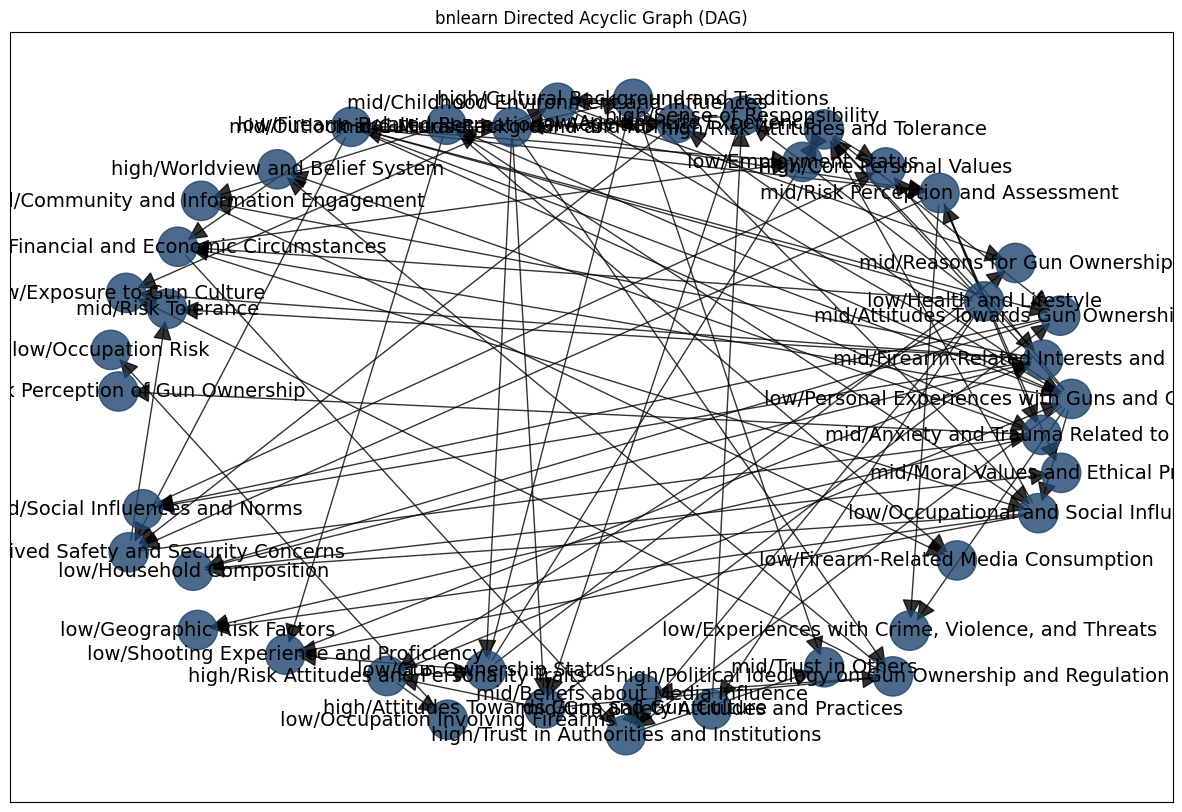

[('high_high', 5),
 ('high_low', 6),
 ('high_mid', 9),
 ('low_high', 10),
 ('low_low', 16),
 ('low_mid', 9),
 ('mid_high', 6),
 ('mid_low', 12),
 ('mid_mid', 18)]

In [7]:
import networkx as nx

model = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
# Plot detected DAG
pos = nx.spring_layout(model['adjmat'])
G = bn.plot(model, pos=pos)

dirs = []
for edge in G['edge_properties']:
    s, t = edge
    s = s.split('/')[0]
    t = t.split('/')[0]
    dirs.append(f"{s}_{t}")

from collections import Counter
sorted(Counter(dirs).items())

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


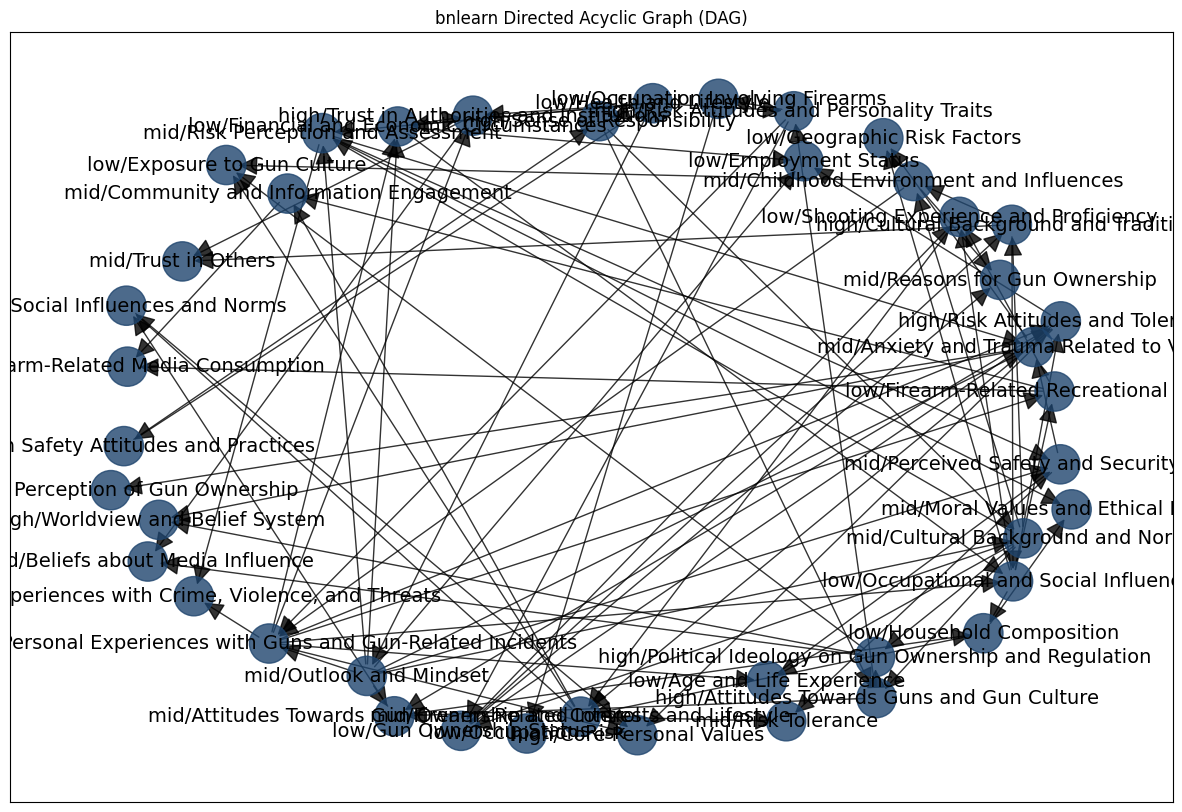

[('high_high', 5),
 ('high_low', 6),
 ('high_mid', 9),
 ('low_high', 10),
 ('low_low', 16),
 ('low_mid', 9),
 ('mid_high', 6),
 ('mid_low', 12),
 ('mid_mid', 18)]

In [8]:
# Compute edge strength using chi-square independence test
model1 = bn.independence_test(model, df, alpha=0.05, prune=True)
pos = nx.spring_layout(model['adjmat'])
G1 = bn.plot(model, pos=pos)

dirs = []
for edge in G1['edge_properties']:
    s, t = edge
    s = s.split('/')[0]
    t = t.split('/')[0]
    dirs.append(f"{s}_{t}")

from collections import Counter
sorted(Counter(dirs).items())

In [10]:
from tabulate import tabulate

print(tabulate(model1['independence_test'], headers="keys"))

    source                                                        target                                                        stat_test         p_value    chi_square    dof
--  ------------------------------------------------------------  ------------------------------------------------------------  -----------  ------------  ------------  -----
 0  high/Risk Attitudes and Personality Traits                    low/Gun Ownership Status                                      True         0               3269.49         9
 1  high/Risk Attitudes and Personality Traits                    low/Personal Experiences with Guns and Gun-Related Incidents  True         0               2832.66         6
 2  high/Risk Attitudes and Personality Traits                    low/Occupation Involving Firearms                             True         6.67143e-26      120.294        3
 3  high/Attitudes Towards Guns and Gun Culture                   mid/Attitudes Towards Gun Ownership and Control            

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


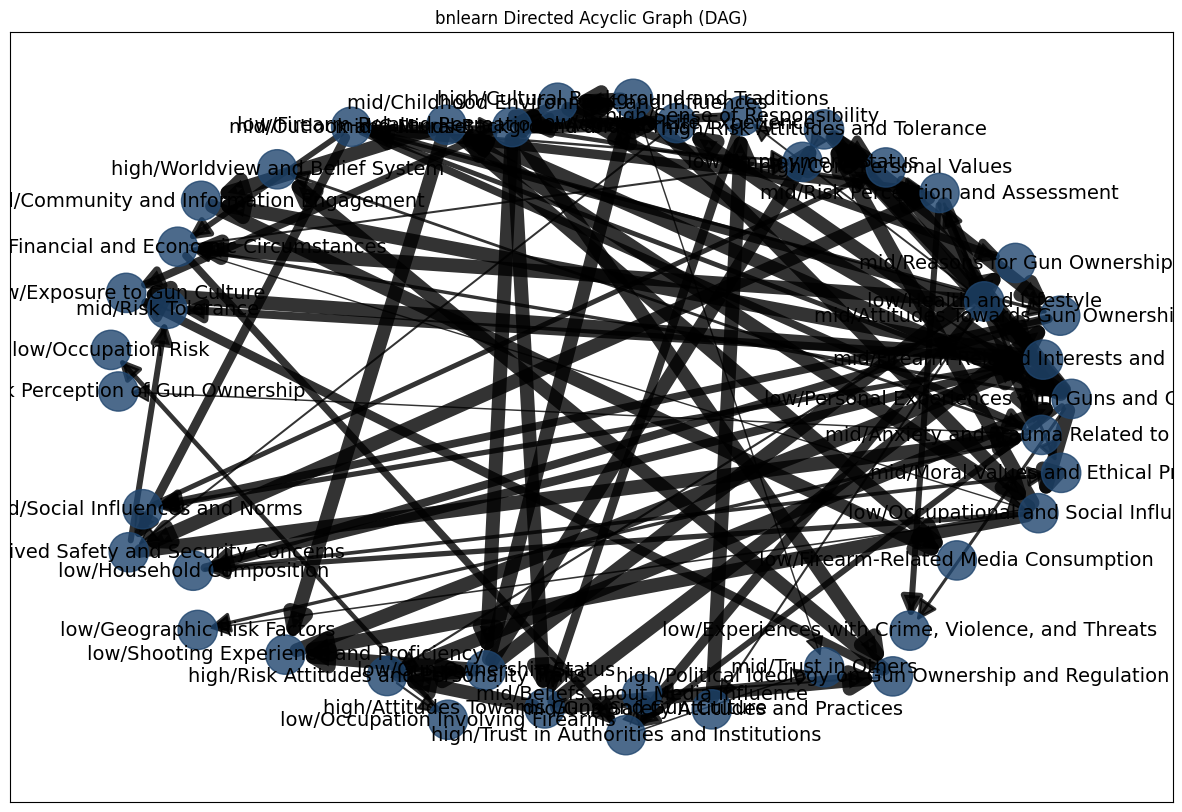

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'user': array([0.76313342, 0.57263875]),
  'high/Core Personal Values': array([0.60315293, 0.76845927]),
  'high/Worldview and Belief System': array([-0.62169024,  0.76267862]),
  'high/Risk Attitudes and Personality Traits': array([-0.40075487, -0.81572729]),
  'high/Attitudes Towards Guns and Gun Culture': array([-0.08346958, -0.91668974]),
  'high/Cultural Background and Traditions': array([0.09450341, 0.98226749]),
  'high/Risk Attitudes and Tolerance': array([0.47867669, 0.88707047]),
  'high/Political Ideology on Gun Ownership and Regulation': array([ 0.61711537, -0.81685551]),
  'high/Trust in Authorities and Institutions': array([ 0.07994024, -1.        ]),
  'high/Sense of Responsibility': array([0.3139185 , 0.92922061]),
  'mid/Childhood Environment and Influences': array([-0.05738483,  0.97002964]),
  'mid/Community and Information Engagement': array([-0.77487083,  0.66450698]),

In [11]:
model3 = bn.independence_test(model, df, alpha=0.05, prune=True)
bn.plot(model3, pos=G['pos'])